In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision.datasets as dsets
import torchvision.transforms as transforms

import numpy as np

import matplotlib.pyplot as plt

# Introducción a PyTorch


[PyTorch](https://pytorch.org/) es una biblioteca de aprendizaje profundo de código abierto basada en el lenguaje de programación Python. Desarrollada por Facebook's AI Research lab, PyTorch se ha convertido en una de las herramientas más populares en el campo de la inteligencia artificial y el aprendizaje automático. En esta notebook, vamos a explorar los conceptos básicos de PyTorch con su unidad de cálculo básica, el [tensor](https://pytorch.org/tutorials/beginner/basics/tensorqs_tutorial.html).

Esta notebook esta basada en:

- Joe Papa. (2021). _PyTorch Pocket Reference: Building and Deploying Deep Learning Models_. O'Reilly Media, Inc.
- [Learning PyTorch with Examples](https://pytorch.org/tutorials/beginner/pytorch_with_examples.html)


## ¿Qué es un tensor?

Un [tensor](https://pytorch.org/tutorials/beginner/basics/tensorqs_tutorial.html) es una matriz multidimensional que puede contener datos de diferentes tipos (por ejemplo, números enteros, flotantes, etc.). Los tensores son similares a los arreglos de NumPy, pero con la diferencia de que los tensores pueden ser utilizados en una GPU para acelerar los cálculos. En PyTorch, los tensores son la unidad básica de cálculo y se pueden crear de varias maneras.


<div style="text-align: center;">
    <img src="https://miro.medium.com/v2/resize:fit:720/format:webp/1*8jdzMrA33Leu3j3F6A8a3w.png" width="500" alt="PyTorch logo">
</div>

## Creación de tensores

Se pueden crear tensores de varias maneras en PyTorch. A continuación, se van a mostrar algunos ejemplos comunes de cómo crear tensores en PyTorch.

### Desde estructuras de datos

Podemos crear un tensor a partir de una lista de Python, una tupla, una matriz de NumPy, etc. Para ello, podemos utilizar la función [torch.tensor()](https://pytorch.org/docs/stable/generated/torch.tensor.html).

In [2]:
x = torch.tensor([1, 2, 3])  # creamos a partir de una lista
y = torch.tensor((1, 2, 3))  # creamos a partir de una tupla
z = torch.tensor(np.array([1, 2, 3]))  # creamos a partir de un array de numpy

print(f"{ x = }")
print(f"{ y = }")
print(f"{ z = }")

 x = tensor([1, 2, 3])
 y = tensor([1, 2, 3])
 z = tensor([1, 2, 3])


Probemos con diferentes dimensiones.

In [3]:
w = torch.tensor(5)  # 0 dimensiones
x = torch.tensor([5, 4, 3])  # 1 dimension
y = torch.tensor([[5, 4, 3], [2, 1, 0]])  # 2 dimensiones
z = torch.tensor([[[1, 2], [3, 4]], [[5, 6], [7, 8]]])  # 3 dimensiones

print(f"{ w = }\n")
print(f"{ x = }\n")
print(f"{ y = }\n")
print(f"{ z = }")

 w = tensor(5)

 x = tensor([5, 4, 3])

 y = tensor([[5, 4, 3],
        [2, 1, 0]])

 z = tensor([[[1, 2],
         [3, 4]],

        [[5, 6],
         [7, 8]]])


Los tensores pueden contener datos de diferentes tipos, como enteros, flotantes, etc. **Lo importante es que todos los elementos de un tensor deben ser del mismo tipo**. Si no se especifica el tipo de datos, PyTorch inferirá el tipo de datos del tensor.
Para saber todos los tipos de datos que se pueden utilizar en PyTorch, puedes consultar la [documentación oficial](https://pytorch.org/docs/stable/tensors.html#data-types).

In [4]:
x = torch.tensor([1, 2, 3], dtype=torch.uint8)  # tipo de dato uint8
y = torch.tensor([1, 2, 3], dtype=torch.float32)  # tipo de dato float32
z = torch.tensor([False, True, False], dtype=torch.bool)  # tipo de dato booleano

print(f"{ x = }")
print(f"{ y = }")
print(f"{ z = }")

 x = tensor([1, 2, 3], dtype=torch.uint8)
 y = tensor([1., 2., 3.])
 z = tensor([False,  True, False])


Podemos ver el tipo de datos de un tensor utilizando el atributo `dtype`.

In [5]:
print(f"{ x.dtype = }")
print(f"{ y.dtype = }")
print(f"{ z.dtype = }")

 x.dtype = torch.uint8
 y.dtype = torch.float32
 z.dtype = torch.bool


### Desde tensores existentes

Podemos crear un tensor a partir de un tensor existente utilizando el método [torch.clone()](https://pytorch.org/docs/stable/generated/torch.clone.html).



In [6]:
x = torch.tensor([1, 2, 3], dtype=torch.float32)
y = x  # y apunta a la misma dirección de memoria que x
z = x.clone()  # z apunta a una nueva dirección de memoria

y[0] = 100  # cambia el valor de x

print(f"{ x = }")
print(f"{ y = }")
print(f"{ z = }")

 x = tensor([100.,   2.,   3.])
 y = tensor([100.,   2.,   3.])
 z = tensor([1., 2., 3.])


> Tip: el método `clone()` es diferenciable, lo que significa que los gradientes se pueden propagar a través de él. Utiliza el método `detach()` si no quieres que los gradientes se propaguen.

### Desde funciones

Existen varias funciones en PyTorch que nos permiten crear tensores con valores específicos. Algunas de estas funciones son:

- [torch.zeros()](https://pytorch.org/docs/stable/generated/torch.zeros.html): crea un tensor con todos los elementos establecidos en cero.
- [torch.ones()](https://pytorch.org/docs/stable/generated/torch.ones.html): crea un tensor con todos los elementos establecidos en uno.
- [torch.rand()](https://pytorch.org/docs/stable/generated/torch.rand.html): crea un tensor con valores aleatorios entre 0 y 1.
- [torch.randn()](https://pytorch.org/docs/stable/generated/torch.randn.html): crea un tensor con valores aleatorios de una distribución normal.
- [torch.arange()](https://pytorch.org/docs/stable/generated/torch.arange.html): crea un tensor con valores espaciados uniformemente dentro de un rango.
- [torch.full()](https://pytorch.org/docs/stable/generated/torch.full.html): crea un tensor con todos los elementos establecidos en un valor específico.


Muchos de estos métodos reciben como argumento la forma del tensor que queremos crear. Por ejemplo, si queremos crear un tensor de 2x3 con todos los elementos establecidos en cero, podemos hacerlo de la siguiente manera:

```python
torch.zeros(2, 3)
```

In [7]:
zeros = torch.zeros((2, 3))  # tensor de 2x3 con ceros (float32)
print(f"{ zeros = }")

zeros = torch.zeros((2, 3), dtype=torch.uint8)  # tensor de 2x3 con ceros (uint8)
print(f"{ zeros = }")

 zeros = tensor([[0., 0., 0.],
        [0., 0., 0.]])
 zeros = tensor([[0, 0, 0],
        [0, 0, 0]], dtype=torch.uint8)


In [8]:
ones = torch.ones(5)  # tensor de 5 elementos con unos
print(f"{ ones = }")

 ones = tensor([1., 1., 1., 1., 1.])


In [9]:
rand = torch.rand(3, 4)  # tensor de 3x4 con valores aleatorios entre 0 y 1
print(f"{ rand = }")

randn = torch.randn(
    3, 4
)  # tensor de 3x4 con valores aleatorios de una distribución normal
print(f"{ randn = }")

 rand = tensor([[0.1586, 0.3328, 0.2401, 0.8444],
        [0.1799, 0.9938, 0.9009, 0.3294],
        [0.7731, 0.8316, 0.5341, 0.5921]])
 randn = tensor([[-0.6867,  0.5595,  0.9084, -0.1330],
        [ 0.7046,  0.3251,  0.2067,  0.6002],
        [ 0.6162, -0.9349,  0.2014,  0.3207]])


In [10]:
arrange = torch.arange(0, 100, 5)  # tensor con valores de 0 a 10 con paso de 2
print(f"{ arrange = }")

 arrange = tensor([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85,
        90, 95])


In [11]:
full_of_5 = torch.full((3, 3), 5)  # tensor de 3x3 con todos los elementos en 5
print(f"{ full_of_5 = }")

 full_of_5 = tensor([[5, 5, 5],
        [5, 5, 5],
        [5, 5, 5]])


## Atributos de un tensor

Los tensores en PyTorch tienen varios atributos que nos permiten acceder a información sobre el tensor. Algunos de los atributos más comunes son:

- [dtype](https://pytorch.org/docs/stable/tensor_attributes.html#torch-dtype): devuelve el tipo de datos del tensor.
- [shape](https://pytorch.org/docs/stable/generated/torch.Tensor.shape.html): devuelve la forma/dimensiones del tensor. También podemos utilizar el método [size()](https://pytorch.org/docs/stable/generated/torch.Tensor.size.html) para obtener la forma del tensor.
- [ndim](https://pytorch.org/docs/stable/generated/torch.Tensor.ndim.html): devuelve el número de dimensiones del tensor. También podemos utilizar el método [dim()](https://pytorch.org/docs/stable/generated/torch.Tensor.dim.html) para obtener el número de dimensiones del tensor.
- [device](https://pytorch.org/docs/stable/generated/torch.Tensor.device.html): devuelve el dispositivo en el que se encuentra el tensor (CPU MPS o GPU).
- [requires_grad](https://pytorch.org/docs/stable/generated/torch.Tensor.requires_grad.html): indica si el tensor requiere cálculo de gradientes.


In [12]:
x = torch.tensor([1, 2, 3])
y = torch.tensor([[1, 2, 3], [4, 5, 6]])

print(f"{ x.shape = }")
print(f"{ x.size() = }\n")

print(
    f"{ y.size() = }"
)  # si no se pone argumento, devuelve una tupla con las dimensiones
print(f"{ y.size(0) = }")  # devuelve el tamaño de la primera dimensión
print(f"{ y.size(1) = }")  # devuelve el tamaño de la segunda dimensión

 x.shape = torch.Size([3])
 x.size() = torch.Size([3])

 y.size() = torch.Size([2, 3])
 y.size(0) = 2
 y.size(1) = 3


In [13]:
x = torch.tensor([1, 2, 3])
y = torch.tensor([[1, 2, 3], [4, 5, 6]])

print(f"{ x.ndim = }")
print(f"{ x.dim() = }\n")

print(f"{ y.ndim = }")
print(f"{ y.dim() = }")

 x.ndim = 1
 x.dim() = 1

 y.ndim = 2
 y.dim() = 2


In [14]:
x = torch.tensor([1, 2, 3])

print(f"{x.device = }")  # cpu es el dispositivo por defecto

if torch.cuda.is_available():  # si hay una GPU disponible (y cuda está instalado)
    x = x.to("cuda")  # movemos el tensor a la GPU
    print("x movido a la GPU")
    print(f"{x.device = }")

if (
    torch.backends.mps.is_available()
):  # si hay un MPS disponible (https://pytorch.org/docs/stable/mps.html)
    x = x.to("mps")
    print("x movido a MPS")
    print(f"{x.device = }")

x.device = device(type='cpu')
x movido a la GPU
x.device = device(type='cuda', index=0)


Otra forma es crear el tensor directamente en el dispositivo que queremos utilizando el argumento `device`. Por ejemplo, si queremos crear un tensor en la GPU, podemos hacerlo de la siguiente manera:

```python
torch.zeros(2, 3, device='cuda')
```

Es importante verificar que el dispositivo esté disponible antes de crear un tensor en él.

## Funciones de reducción y agregación

PyTorch proporciona varias funciones de reducción que nos permiten reducir un tensor a un solo valor. Algunas de las funciones de reducción más comunes son:

- [torch.sum()](https://pytorch.org/docs/stable/generated/torch.sum.html): calcula la suma de todos los elementos de un tensor.
- [torch.mean()](https://pytorch.org/docs/stable/generated/torch.mean.html): calcula la media de todos los elementos de un tensor.
- [torch.max()](https://pytorch.org/docs/stable/generated/torch.max.html): calcula el valor máximo de un tensor.
- [torch.min()](https://pytorch.org/docs/stable/generated/torch.min.html): calcula el valor mínimo de un tensor.
- [torch.argmax()](https://pytorch.org/docs/stable/generated/torch.argmax.html): devuelve el índice del valor máximo de un tensor.
- [torch.argmin()](https://pytorch.org/docs/stable/generated/torch.argmin.html): devuelve el índice del valor mínimo de un tensor.

Estas funciones también aceptan un argumento `dim` que nos permite especificar la dimensión a lo largo de la cual queremos realizar la reducción.

In [15]:
x = torch.tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9]], dtype=torch.float32)

print(f"{torch.sum(x) = }")  # suma de todos los elementos
print(f"{torch.sum(x, dim=0) = }")  # suma de cada columna
print(f"{torch.sum(x, dim=1) = }\n")  # suma de cada fila

print(f"{torch.mean(x) = }")  # media de todos los elementos
print(f"{torch.mean(x, dim=0) = }")  # media de cada columna
print(f"{torch.mean(x, dim=1) = }\n")  # media de cada fila

print(f"{torch.max(x) = }")  # máximo de todos los elementos
print(f"{torch.max(x, dim=0) = }")  # máximo de cada columna
print(f"{torch.max(x, dim=1) = }\n")  # máximo de cada fila

print(f"{torch.min(x) = }")  # mínimo de todos los elementos
print(f"{torch.min(x, dim=0) = }")  # mínimo de cada columna
print(f"{torch.min(x, dim=1) = }\n")  # mínimo de cada fila

print(
    f"{torch.argmax(x) = }"
)  # índice del máximo de todos los elementos, como es una matriz, devuelve el índice en el array plano
print(f"{torch.argmax(x, dim=0) = }")  # índice del máximo de cada columna
print(f"{torch.argmax(x, dim=1) = }\n")  # índice del máximo de cada fila

torch.sum(x) = tensor(45.)
torch.sum(x, dim=0) = tensor([12., 15., 18.])
torch.sum(x, dim=1) = tensor([ 6., 15., 24.])

torch.mean(x) = tensor(5.)
torch.mean(x, dim=0) = tensor([4., 5., 6.])
torch.mean(x, dim=1) = tensor([2., 5., 8.])

torch.max(x) = tensor(9.)
torch.max(x, dim=0) = torch.return_types.max(
values=tensor([7., 8., 9.]),
indices=tensor([2, 2, 2]))
torch.max(x, dim=1) = torch.return_types.max(
values=tensor([3., 6., 9.]),
indices=tensor([2, 2, 2]))

torch.min(x) = tensor(1.)
torch.min(x, dim=0) = torch.return_types.min(
values=tensor([1., 2., 3.]),
indices=tensor([0, 0, 0]))
torch.min(x, dim=1) = torch.return_types.min(
values=tensor([1., 4., 7.]),
indices=tensor([0, 0, 0]))

torch.argmax(x) = tensor(8)
torch.argmax(x, dim=0) = tensor([2, 2, 2])
torch.argmax(x, dim=1) = tensor([2, 2, 2])



## Combinación y división

PyTorch proporciona varias funciones que nos permiten combinar y dividir tensores. Algunas de las funciones más comunes son:

- [torch.cat()](https://pytorch.org/docs/stable/generated/torch.cat.html): combina varios tensores a lo largo de una dimensión específica.
- [torch.stack()](https://pytorch.org/docs/stable/generated/torch.stack.html): apila varios tensores a lo largo de una nueva dimensión.
- [torch.split()](https://pytorch.org/docs/stable/generated/torch.split.html): divide un tensor en varias partes a lo largo de una dimensión específica.
- [torch.chunk()](https://pytorch.org/docs/stable/generated/torch.chunk.html): divide un tensor en varias partes a lo largo de una dimensión específica.
- [torch.squeeze()](https://pytorch.org/docs/stable/generated/torch.squeeze.html): elimina dimensiones de tamaño 1 de un tensor.
- [torch.unsqueeze()](https://pytorch.org/docs/stable/generated/torch.unsqueeze.html): agrega una dimensión de tamaño 1 a un tensor.
- [torch.reshape()](https://pytorch.org/docs/stable/generated/torch.reshape.html): cambia la forma de un tensor.

Existen muchas más funciones que nos permiten combinar y dividir tensores en PyTorch. Puedes consultar la [documentación oficial](https://pytorch.org/docs/stable/torch.html) para obtener más información sobre estas funciones.

In [16]:
x = torch.tensor([1, 2, 3, 4, 5, 6])
y = torch.tensor([5, 4, 3, 2, 1, 0])

print(f"{torch.cat((x, y)) = }\n")  # concatenación de tensores
print(f"{torch.stack((x, y)) = }\n")  # apilamiento de tensores
print(f"{torch.split(x, 2) = }\n")  # división de un tensor en partes de tamaño 2
print(f"{torch.chunk(x, 2) = }\n")  # división de un tensor en 2 partes

print(
    f"{torch.squeeze(torch.zeros(1, 2, 1, 2)) = }\n"
)  # elimina las dimensiones de tamaño 1
print(f"{torch.unsqueeze(torch.zeros(2, 2), 0) = }")  # añade una dimensión al principio

torch.cat((x, y)) = tensor([1, 2, 3, 4, 5, 6, 5, 4, 3, 2, 1, 0])

torch.stack((x, y)) = tensor([[1, 2, 3, 4, 5, 6],
        [5, 4, 3, 2, 1, 0]])

torch.split(x, 2) = (tensor([1, 2]), tensor([3, 4]), tensor([5, 6]))

torch.chunk(x, 2) = (tensor([1, 2, 3]), tensor([4, 5, 6]))

torch.squeeze(torch.zeros(1, 2, 1, 2)) = tensor([[0., 0.],
        [0., 0.]])

torch.unsqueeze(torch.zeros(2, 2), 0) = tensor([[[0., 0.],
         [0., 0.]]])


In [17]:
x = torch.arange(9)
print(f"{torch.reshape(x, (3, 3)) = }\n")  # reorganiza los elementos en una matriz 3x3
print(
    f"{torch.reshape(x, (3, -1)) = }\n"
)  # -1 significa que se infiere el tamaño de esa dimensión
print(f"{torch.reshape(x, (-1, 3)) = }\n")

x = torch.tensor([1, 2, 3, 4, 5, 6])
print(f"{torch.reshape(x, (2, 3)) = }\n")  # reorganiza los elementos en una matriz 2x3
print(f"{torch.reshape(x, (3, 2)) = }\n")  # reorganiza los elementos en una matriz 3x2
print(f"{torch.reshape(x, (6, -1)) = }\n")  # reorganiza los elementos en una matriz 6x1

torch.reshape(x, (3, 3)) = tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])

torch.reshape(x, (3, -1)) = tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])

torch.reshape(x, (-1, 3)) = tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])

torch.reshape(x, (2, 3)) = tensor([[1, 2, 3],
        [4, 5, 6]])

torch.reshape(x, (3, 2)) = tensor([[1, 2],
        [3, 4],
        [5, 6]])

torch.reshape(x, (6, -1)) = tensor([[1],
        [2],
        [3],
        [4],
        [5],
        [6]])



## Cálculo de gradientes

PyTorch proporciona una forma sencilla de calcular gradientes utilizando el módulo [torch.autograd](https://pytorch.org/docs/stable/autograd.html). Este módulo nos permite calcular gradientes automáticamente utilizando el método de retropropagación. Para ello, debemos establecer el atributo `requires_grad` en `True` al crear un tensor. Esto indica que queremos calcular los gradientes para este tensor.

In [18]:
# 1) Creamos un tensor con dos valores y activamos el cálculo de gradientes
x = torch.tensor([2.0, 3.0], requires_grad=True)
print(f"{x = }")

# 2) Definimos una función simple:
#    y = x1 * x2
y = x[0] * x[1]
print(f"{y = }")

# 3) Calculamos gradientes: esto rellena x.grad con dy/dx
y.backward()
print(f"{x.grad = }")


x = tensor([2., 3.], requires_grad=True)
y = tensor(6., grad_fn=<MulBackward0>)
x.grad = tensor([3., 2.])


El gradiente $\nabla_x y$ es un vector que nos dice **cuánto cambia $y$** si cambiamos un poquito **cada componente** de $x$.  

- $\frac{\partial y}{\partial x_1} = x_2$.
- $\frac{\partial y}{\partial x_2} = x_1$.

Por eso PyTorch nos devuelve `x.grad = [3., 2.]`.

- Si aumento **solo** $x_1$ en una pequeña cantidad $\delta$, el producto $y$ aumentará aproximadamente $x_2 \times \delta$.  
  Aquí $x_2=3$, así que el “efecto” de subir $x_1$ es multiplicado por 3.  
- De forma análoga, subir $x_2$ hace que $y$ cambie en aproximadamente $x_1 \times \delta$.

## CPU/GPU/MPS

PyTorch es compatible con varios dispositivos, como CPU, GPU y MPS (Metal Performance Shaders). Podemos mover tensores entre dispositivos utilizando el método [to()](https://pytorch.org/docs/stable/generated/torch.Tensor.to.html). También podemos utilizar el método [cuda()](https://pytorch.org/docs/stable/generated/torch.Tensor.cuda.html) para mover un tensor a la GPU y el método [cpu()](https://pytorch.org/docs/stable/generated/torch.Tensor.cpu.html) para mover un tensor a la CPU.

In [19]:
# definimos el dispositivo que vamos a usar
DEVICE = "cpu"  # por defecto, usamos la CPU
if torch.cuda.is_available():
    DEVICE = "cuda"  # si hay GPU, usamos la GPU
elif torch.backends.mps.is_available():
    DEVICE = "mps"  # si no hay GPU, pero hay MPS, usamos MPS

print(f"Device: {DEVICE}")

Device: cuda


In [20]:
if torch.cpu.is_available():
    x = torch.rand(2, 900000).cpu()            # Initialize with random number (uniform distribution)
    y = torch.randn(900000,200).cpu()           # With normal distribution (SD=1, mean=0)
    z = torch.randperm(200).cpu()           # Size 200. Random permutation of integers from 0 to 200

    print('CPU time:')
    %timeit torch.mm(x,y)+z

if torch.cuda.is_available():
    x = torch.rand(2, 900000).cuda()            
    y = torch.randn(900000,200).cuda()          
    z = torch.randperm(200).cuda()

    print(' ')
    print('GPU time:')
    %timeit torch.mm(x,y)+z
    
if torch.backends.mps.is_available():
    x = torch.rand(2, 900000).mps()            
    y = torch.randn(900000,200).mps()          
    z = torch.randperm(200).mps()

    print(' ')
    print('MPS time:')
    %timeit torch.mm(x,y)+z

CPU time:
28.4 ms ± 769 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)
 
GPU time:
The slowest run took 7.05 times longer than the fastest. This could mean that an intermediate result is being cached.
42.5 μs ± 41.2 μs per loop (mean ± std. dev. of 7 runs, 1 loop each)


# FeedForward networks

Son la unidad más simple de red neuronal, con su origen en el perceptron de muchas capas. La idea es crear una secuencia lineal de neuronas (capa) que reciben nuestro input. 

![Image](https://upload.wikimedia.org/wikipedia/commons/c/c2/MultiLayerNeuralNetworkBigger_english.png)

De esta manera la primera capa de neuronas (input layer) recibe los datos y las capas subsiguientes reciben el resultados de capas anteriores. La última capa (output layer) es la encargada de generar una predicción a partir de nuestros inputs.

***

En este notebook vamos a usar un dataset muy simple y conocido de imágenes, Fashion-MNIST. Se trata de un dataset de ropa y calzado, la idea es usar redes neuronales para clasificar cada una de las imágenes el tipo de ropa que representa. 

Para trabajar con imagenes vamos a hacer uso de una librería complementaria a Pytorch: **torchvision** (https://pytorch.org/docs/stable/torchvision/index.html) que incluye varios datasets precargados, modelos preentrenados y algunas utilidades para trabajar con imágenes que nos van a resultar útiles.

*** 

En la celda de abajo vamos a carga nuestro dataset y mostrar algunas imagenes de ejemplo.


100%|██████████| 26.4M/26.4M [00:03<00:00, 7.32MB/s]


Extracting ./data\FashionMNIST\raw\train-images-idx3-ubyte.gz to ./data\FashionMNIST\raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 123kB/s]


Extracting ./data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to ./data\FashionMNIST\raw



100%|██████████| 4.42M/4.42M [00:01<00:00, 2.29MB/s]


Extracting ./data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to ./data\FashionMNIST\raw



100%|██████████| 5.15k/5.15k [00:00<?, ?B/s]

Extracting ./data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\FashionMNIST\raw

Tamaño del dataset 60000 imagenes.
Clases posibles: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
Objeto imagen: <PIL.Image.Image image mode=L size=28x28 at 0x2460CD73990> - Clase 9
Detalles de la imagen (28, 28) pixeles


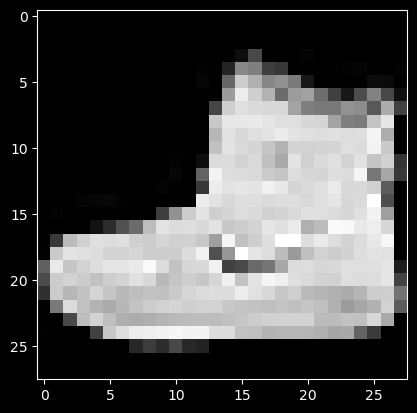

In [21]:
MNIST_PATH = "./data"  # ruta donde se guardan los datos

mnist_dataset = dsets.FashionMNIST(MNIST_PATH, download=True)

print(f"Tamaño del dataset {len(mnist_dataset)} imagenes.")
print(f"Clases posibles: {mnist_dataset.classes}")

data_idx = 0  # Indice (0-59999) de la imagen que queremos ver
image, label = mnist_dataset[0] 

print(f"Objeto imagen: {image} - Clase {label}")
print(f"Detalles de la imagen {image.size} pixeles")

plt.imshow(image, cmap='gray')
plt.show()

### Clasificador

Ahora que tenemos una idea de como es nuestro dataset, vamos a crear un modelo FeedForward para predecir la clase de la imagen que usemos como input. 

Antes que nada, vamos a necesitar dividir el dataset total en conjuntos de **entrenamiento**, **validacion** y **test**. Vamos a usar un ratio de 80 y 20% respectivamente. El set de test se puede descargar por separado con torchvision. Además, vamos a necesitar una manera de cargar **batches** de datos a la vez, para entrenar nuestra red. Pytorch nos proporciona varias ayudas para esto.

***

Finalmente, queda aclarar el uso de **tranformaciones** sobre las imágenes. Por lo pronto, tenemos objetos de tipo PIL Image, necesitamos (al menos) convertirlos en Tensores, para que Pytorch los pueda manejar.

Hay un numero inmenso de transformaciones posibles que podemos usar en nustras imagenes, en este caso basta con tranformarlas a tensores, pero dejamos este link para otros casos: https://pytorch.org/docs/stable/torchvision/transforms.html


In [22]:
#Esto nos permite cambiarle la forma a un tensor aplicandole una transformacion. 

class ReshapeTransform:
    def __init__(self, new_size):
        self.new_size = new_size

    def __call__(self, img):
        return torch.reshape(img, self.new_size)

In [23]:
img_transforms = transforms.Compose([transforms.ToTensor(), ReshapeTransform((-1,))])

# Descargamos los datasets
mnist_train_dataset = dsets.FashionMNIST(MNIST_PATH, download=True, train=True, transform=img_transforms)

# Separamos el train set en train y validation
train_size = int(0.8 * len(mnist_train_dataset))
val_size = len(mnist_train_dataset) - train_size
train_set, val_set = torch.utils.data.random_split(mnist_train_dataset, [train_size, val_size])

mnist_test_dataset = dsets.FashionMNIST(MNIST_PATH, download=True, train=False, transform=img_transforms)

# Creamos objetos DataLoader (https://pytorch.org/docs/stable/data.html) que nos va a permitir crear batches de data automaticamente.

# Cuantas imagenes obtener en cada iteracion!
BATCH_SIZE = 64
NUM_WORKERS = 1

# Creamos los loaders
train_loader = torch.utils.data.DataLoader(train_set, batch_size=BATCH_SIZE, shuffle=True, num_workers=NUM_WORKERS)
val_loader = torch.utils.data.DataLoader(val_set, batch_size=BATCH_SIZE, shuffle=False, num_workers=NUM_WORKERS)

test_loader = torch.utils.data.DataLoader(mnist_test_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=NUM_WORKERS)

### Modelo

Vamos a considerar cada imagen como un tensor de una sola dimensión, de largo 28*28 = 784. Cada uno de esos valores representa el valor de un pixel de nuestra imagen original.

Nuestra red va a recibir ese tensor como input (en realidad, un batch de tensores de largo 784) que va a ser trabajado por varias capas ocultas con diferente número de neuronas hasta llegar a una capa de salida con 10 outputs, 1 por cada clase posible.

***

Vamos utilizar capas conectadas totalmente, tambien conocidas como Fully Connected, Dense, o Linear en Pytorch (https://pytorch.org/docs/stable/nn.html). Para crearlas necesitamos especificar las dimensiones del tensor de entrada, y el de salida; luego internamente Pytorch genera la matriz de pesos por los cuales multiplicar la entrada para generar la salida. Luego de cada una de estas operaciones necesitamos usar una funcion de activacion no linear, en este caso, vamos a usar ReLU: https://pytorch.org/docs/stable/nn.html#relu. 

***

Para implementar un modelo **cualquiera** alcanza con definir un metodo **init** donde especificamos la arquitectura del mismo, y un método **forward** donde especificamos cómo interactúan nuestras capas frente a un nuevo input.

***



In [24]:
# Definicion del modelo que vamos a usar. En Pytorch los modelos se definen como clases, que heredan de nn.Module

class FeedForwardModel(nn.Module):

    def __init__(self, number_classes=10):
        super(FeedForwardModel, self).__init__()
        self.linear1 = nn.Linear(in_features=784, out_features=128)
        self.linear2 = nn.Linear(in_features=128, out_features=64)
        self.output = nn.Linear(in_features=64, out_features=number_classes)
  
    def forward(self, x):
        x = x.view(x.size(0), -1)  # aplana la imagen
        x = F.relu(self.linear1(x))
        x = F.relu(self.linear2(x))
        logits = self.output(x)

        return logits


model = FeedForwardModel(number_classes=10)

### Entrenando el modelo

Para entrenar un modelo necesitamos una funcion de costo o pérdida (normalmente referida como loss function: https://pytorch.org/docs/stable/nn.html#loss-functions). En este curso no nos vamos a meter en mucho detalle sobre las funciones de costo, para este ejercicio y el siguiente vamos a usar la CrossEntropyLoss, y cuando necesiten otra la vamos a especificar.

El objetivo de esta funcion es darnos un valor de que tan malas fueron las predicciones del modelo respecto a los valores de verdad. Haciendo uso de backpropagation y del gradiente de esta funcion podemos optimizar los pesos de nuestra red tal que "aprenda" a hacer mejores predicciones. De nuevo, la lógica detras de toda esta optimización no nos compete en este curso y lo dejamos para la disciplina de Deep Learning.

***
Como mencionamos arriba, el costo de computa usando las predicciones del modelo y las etiquetas verdaderas de nuestros datos y, el trabajo de actualizar los pesos usando los gradientes lo realiza un optimizador de Pytorch: https://pytorch.org/docs/stable/optim.html.

In [25]:
LEARNING_RATE = 0.001

ff_model = FeedForwardModel(number_classes=10).to(DEVICE)
criterion = nn.CrossEntropyLoss().to(DEVICE)
ff_optimizer = optim.SGD(ff_model.parameters(), lr=LEARNING_RATE)

In [26]:
def train_model(model, train_loader, val_loader, loss_func, optimizer, epochs):
    for _ in range(epochs):  # Iteramos sobre el dataset entero muchas veces
        for images, labels in train_loader:
            images = images.to(DEVICE)
            labels = labels.to(DEVICE)

            # Reseteamos los gradientes de los pesos del modelo.
            optimizer.zero_grad()   

            # Obtenemos las predicciones para las nuevas imagenes llamando a nuestro modelo.
            predictions = model(images)    

            # Calulamos el costo de nuestras predicciones respecto a la verdad
            loss = loss_func(predictions, labels)

            # Computamos los gradientes con backward y actualizamos los pesos con un optimizer.step()
            loss.backward()
            optimizer.step()


        # Luego de cada epoch de entrenamiento vemos la performance (accuracy) en el set de validacion
        with torch.no_grad():
            correct_predictions = 0.0

            for images, labels in val_loader:
                images = images.to(DEVICE)
                labels = labels.to(DEVICE)

                predictions = model(images)
                predictions = torch.argmax(predictions, dim=1)

                correct_predictions += (predictions == labels).detach().cpu().float().sum().item()

        print(f"Validation accuracy {(100 * correct_predictions / len(val_loader.dataset)):.2f} %")

In [27]:
def test_model(model, test_loader):
    # Finalmente Reportamos la performance en el test set:
    with torch.no_grad():
        correct_predictions = 0.0

        for i, data in enumerate(test_loader):
            images, labels = data
            images = images.to(DEVICE)
            labels = labels.to(DEVICE)

            predictions = model(images)
            predictions = torch.argmax(predictions, dim=1)

            correct_predictions += (predictions == labels).detach().cpu().float().sum().item()

    print(f"Test set accuracy {(100 * correct_predictions / len(test_loader.dataset)):.2f} %")

In [ ]:
# Usando las funciones definidas arriba entrenar un modelo es trivial
train_model(ff_model, train_loader, val_loader, loss_func=criterion, optimizer=ff_optimizer, epochs=15)

In [ ]:
test_model(ff_model, test_loader)

# Redes Convolucionales


![Image](https://www.unite.ai/wp-content/uploads/2019/12/Typical_cnn-1.png)


Las redes convolucionales (CNNs) se basan en el uso de una técnica muy usada en el campo de computer vision tradicional, las [convoluciones](https://en.wikipedia.org/wiki/Kernel_\(image_processing\)) , la idea es crear un filtro pequeño que pasamos por encima de toda la imagen y nos permite detectar distintos elementos (como son líneas verticales, horizontales, diagonales, circulos, etc). EL gran problema de las convoluciones es que para crear dichos filtros debemos poder especificar distintos valores (pesos) para cada región en el mismo. 

Cada filtro (tambien conocido como kernel) nos permite identificar algo en particular en la imágen, y aplicar un filtro al resultado de otro (u otros) nos permite obtener informacion de más alto nivel (como por ejemplo detectar ojos, ruedas, puertas, etc).

![Image](https://d2l.ai/_images/correlation.svg)

***

Las redes convolucionales nos dan una manera de no sólo aprender los valores óptimos para dichos filtros (mediante backprop) sino tambien la posibilidad de hacerlo a escala usndo un número arbitrario de los mismos. Una gran ventaja que nos trae el uso de filtros, es el hecho de que requieren de un número muy chico de pesos a entrenar, lo que reduce el tamaño de nuestra red y nos permite entrenar mas rápido (o redes mas grandes y profundas con el mismo hardware).

Una cosa a notar en las redes convolucionales es el hecho de que las imágenes se van reduciendo en su tamaño a medida que fluyen por la red, esto se debe a la opeación de `maxpooling` que toma regiones (por lo general de 2x2) en nuestra imagen y se queda con el valor más alto en la zona, reduciendo asi el tamaño de la imagen. El resultado de aplicar un filtro de convolución a una imagen se llama `feature_map` y se puede pensar como otra imagen que describe la características de la original. 

***

Al final de nuestra red, necesitamos formar una predicción de la clase de nuestra imagen, por lo que tenemos que "achatar" estos feature maps y pasarlos por una (o varias) capas lineales que generen una predicción. Esto se puede ver como representar toda la informacion que conocemos de la imagen, como por ejemplo si tiene nariz, orejas, pelo, en un sólo vector; y decidir que ese vector representa a un perro.

***

Visualización de la red convolucional: https://adamharley.com/nn_vis/cnn/2d.html

In [ ]:
# Descargamos los datasets
mnist_train_dataset = dsets.FashionMNIST(MNIST_PATH, download=True, train=True, transform=transforms.ToTensor())

# Separamos el train set en train y validation
train_size = int(0.8 * len(mnist_train_dataset))
val_size = len(mnist_train_dataset) - train_size
train_set, val_set = torch.utils.data.random_split(mnist_train_dataset, [train_size, val_size])

mnist_test_dataset = dsets.FashionMNIST(MNIST_PATH, download=True, train=False, transform=transforms.ToTensor())

# Creamos objetos DataLoader (https://pytorch.org/docs/stable/data.html) que nos va a permitir crear batches de data automaticamente.

# Cuantas imagenes obtener en cada iteracion!
BATCH_SIZE = 64
NUM_WORKERS = 1

# Creamos los loaders
train_loader = torch.utils.data.DataLoader(train_set, batch_size=BATCH_SIZE, shuffle=True, num_workers=NUM_WORKERS)
val_loader = torch.utils.data.DataLoader(val_set, batch_size=BATCH_SIZE, shuffle=False, num_workers=NUM_WORKERS)

test_loader = torch.utils.data.DataLoader(mnist_test_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=NUM_WORKERS)

### Modelo Convolucional

Igual que con el modelo FeedForward, para crear un modelo usando convoluciones necesitamos crear una clase, definir los metodos **init** y **forward** y especificar la arquitectura y comportamiento de los componentes del modelo. 

En particular vamos a usar:

- capas convolucionales de 2D (https://pytorch.org/docs/stable/nn.html#conv2d) a las que tenemos que especificarles la cantidad de canales de entrada (1 para gris, 3 para color y X para el resultado de un filtro anterior), una cantidad de filtros a usar (out_channels), el tamaño de los mismos (kernel_size) y si aplicamos padding (relleno) o no (esto nos permite hacer convoluciones que no modifiquen el tamaño original de las imagenes). 

- Capas de maxpooling (https://pytorch.org/docs/stable/nn.html#maxpool2d) a las que tenemos que decirles el tamaño de la ventana a mirar y el largo del paso que deben tomar (stride).

- Finalmente tambien haremos uso de capas lineales y ReLUs como hicimos anteriormente.

In [ ]:
class ConvolutionalModel(nn.Module):
    def __init__(self, number_classes):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=8, kernel_size=3, padding=1)
        
        self.pooling_layer = nn.MaxPool2d(kernel_size=2, stride=2)   # Regiones de 2x2 con paso 2.
        
        # Nuestras imagenes son de 28x28 y vamos a aplicar 2 veces la capa de pooling
        # por lo que el resultado es de tamaño 7x7 (28 / 2 / 2).
        # El 16 es porque terminamos con 16 feature maps de 7x7
        
        self.fc1 = nn.Linear(in_features=7*7*8, out_features=128) 
        
        self.output = nn.Linear(in_features=128, out_features=number_classes)
        

    def forward(self, new_input):
        # new_input shape: (batch_size, 1, 28, 28)
        result = self.conv1(new_input)
        # result shape: (batch_size, 16, 28, 28)
        result = F.relu(self.pooling_layer(result))
        # result shape: (batch_size, 16, 14, 14)
        
        result = self.conv2(result)
        # result shape: (batch_size, 8, 14, 14)
        result = F.relu(self.pooling_layer(result))     
        # result shape: (batch_size, 8, 7, 7)
        
        # "Achatamos" los feature maps
        result = result.view(result.size(0), -1)
        result = F.relu(self.fc1(result))
        
        return self.output(result)

In [ ]:
conv_model = ConvolutionalModel(number_classes=10).to(DEVICE)

criterion = nn.CrossEntropyLoss().to(DEVICE)
conv_optimizer = optim.SGD(conv_model.parameters(), lr=LEARNING_RATE)

train_model(conv_model, train_loader, val_loader, loss_func=criterion, optimizer=conv_optimizer, epochs=15)

In [ ]:
test_model(conv_model, test_loader)

# Tareas

- [extra] Mejorar el modelo de la red convolucional.
- [extra] Probar con otros datasets de imagenes. 